# UCS Search Algorithm

### Import the Graph Library and Other Utilities

In [1]:
import sys
import os

parent_dir = os.path.abspath(os.path.join(os.getcwd(), "../../"))

sys.path.append(parent_dir)

from assignment_1.lib.graph import Graph
from assignment_1.lib.load_romanian_cities import load_romania
from assignment_1.lib.matplotlib_utils import stack_plot, graph_visualizer
from assignment_1.lib.experiment_utils import experiment, city_benchmark

<h3>Algorithm Implementation</h3>

In [4]:
from heapq import heapify, heappop, heappush

def ucs_search(graph: Graph, start: str, goal: str) -> bool:
    # sanity check to make sure both nodes exist on the graph.
    if start not in graph or goal not in graph:
        raise ValueError("The start and/or the goal nodes do not exist on the graph.")
    
    visited = set([start])

    curr_node = start
    fringe = [ (start, [start], 0,) ]
    heapify(fringe)

    while fringe:
        curr_node, curr_path, curr_cost = heappop(fringe)

        if curr_node == goal:
            return curr_path

        visited.add(curr_node)

        for neighbour, weight in graph.get_neighbours(curr_node):
            if neighbour not in visited:
                new_path = curr_path + [neighbour]
                new_cost = weight + curr_cost

                heappush(fringe, tuple([neighbour, new_path, new_cost]))

    return

#### A, B, C. The benchmark should be finding the path between each node. Randomly pick 10 cities. Find the path between them.

In [5]:

average_time, average_path_length = city_benchmark(ucs_search)

#### D. Create random graphs with a number of nodes n = 10, 20, 30, 40. Randomly connect nodes with the probability of edges p = 0.2, 0.4, 0.6, 0.8. In total, you will have 16 graphs.

In [7]:
experiment_graphs, results = experiment(ucs_search, [10, 20, 30, 40], [0.2, 0.4, 0.6, 0.8])

##### (Optional) Code for graph visualizer, to visualize the generated graphs with their edges

In [ ]:
graph_visualizer(experiment_graphs)

## Plot the graphs using matplotlib.pyplot

#### A. Plot the time taken

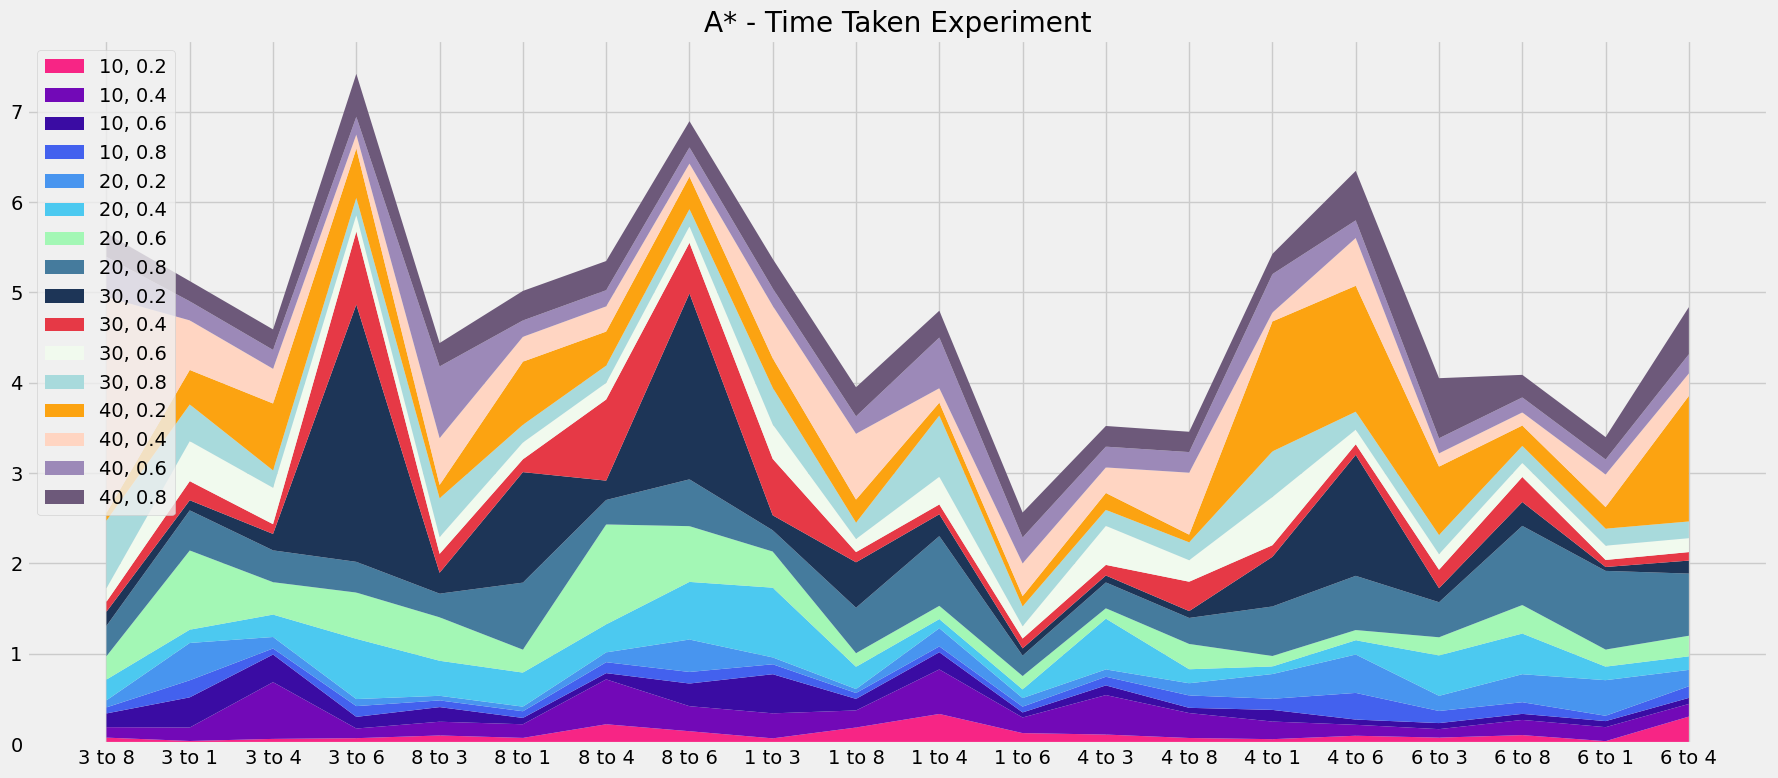

In [8]:
import matplotlib.pyplot as plt

# Define the plot titles for each subplot pair
plt.style.use('fivethirtyeight')

nodes = list(results['10, 0.2'].keys())
labels = []
time_taken = []

for i, (label, result) in enumerate(results.items()):
    labels.append(label)
    time_taken.append(list(round(time, 3) for time, path in result.values()))

stack_plot("A* - Time Taken Experiment", nodes, time_taken, labels)

#### B. Plot the solution path length

In [ ]:
import matplotlib.pyplot as plt

# Define the plot titles for each subplot pair
plt.style.use('fivethirtyeight')

nodes = list(results['10, 0.2'].keys())
labels = []
path_length = []

for i, (label, result) in enumerate(results.items()):
    labels.append(label)
    path_length.append(list(len(path) if path else 0 for time, path in result.values()))

stack_plot("A* - Solution Path Length Experiment", nodes, path_length, labels)